<a href="https://colab.research.google.com/github/thargro5/Machine-Learning/blob/main/MLHW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.optim import SGD
import matplotlib.pyplot as plt
# Data
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

# Normalization
t_u_normalized = (t_u - torch.mean(t_u)) / torch.std(t_u)

# Parameters
w2 = torch.ones(1, requires_grad=True)
w1 = torch.ones(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Nonlinear model
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss function
def loss_fn(y, y_pred):
    return ((y - y_pred) ** 2).mean()

# Hyperparameters
learning_rate = 1e-4
n_epochs = 5000

# Optimizer
optimizer = SGD([w2, w1, b], lr=learning_rate)

# Training loop
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(t_u_normalized, w2, w1, b)
    loss = loss_fn(t_c, y_pred)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Logging every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.4f}")

# Final parameters
print(f"Final Parameters: w2={w2.item()}, w1={w1.item()}, b={b.item()}")

Epoch 0, Loss 154.0711
Epoch 500, Loss 119.4012
Epoch 1000, Loss 95.0505
Epoch 1500, Loss 77.3686
Epoch 2000, Loss 64.1122
Epoch 2500, Loss 53.8822
Epoch 3000, Loss 45.7892
Epoch 3500, Loss 39.2549
Epoch 4000, Loss 33.8930
Epoch 4500, Loss 29.4369
Final Parameters: w2=2.906043291091919, w1=5.934542655944824, b=5.091831207275391


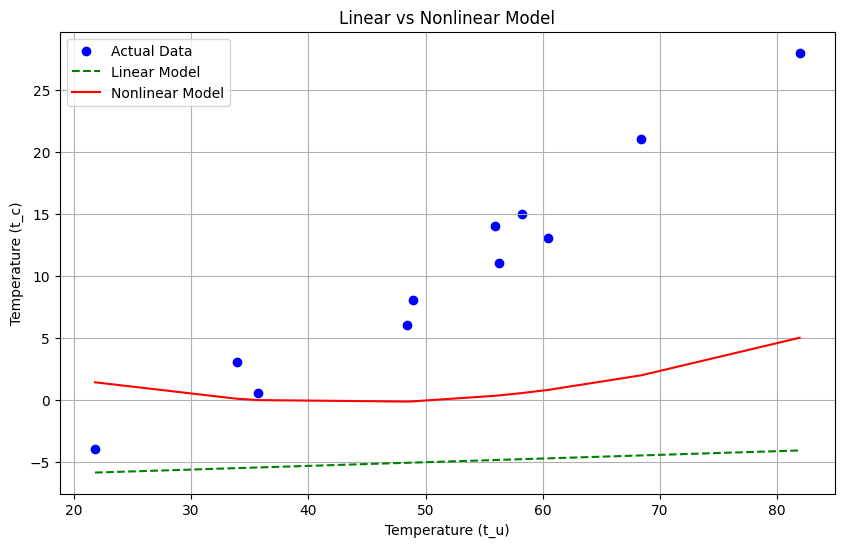

In [4]:
 # Linear model definition
def linear_model(t_u, w, b):
    return w * t_u + b

# Parameters for the linear model
w_linear = torch.tensor(0.5, requires_grad=False)
b_linear = torch.tensor(-5.0, requires_grad=False)

# Predictions using the linear model
y_pred_linear = linear_model(t_u_normalized, w_linear, b_linear)

# Predictions using the nonlinear model
w2_best = torch.tensor(1.0, requires_grad=False)
w1_best = torch.tensor(1.0, requires_grad=False)
b_best = torch.tensor(0.0, requires_grad=False)
y_pred_nonlinear = model(t_u_normalized, w2_best, w1_best, b_best)

# Sort the data for consistent visualization
sorted_indices = torch.argsort(t_u)
t_u_sorted = t_u[sorted_indices]
t_u_normalized_sorted = t_u_normalized[sorted_indices]
y_pred_linear_sorted = linear_model(t_u_normalized_sorted, w_linear, b_linear)
y_pred_nonlinear_sorted = model(t_u_normalized_sorted, w2_best, w1_best, b_best)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(t_u, t_c, label="Actual Data", color="blue")
plt.plot(t_u_sorted, y_pred_linear_sorted.detach(), label="Linear Model", color="green", linestyle="--")
plt.plot(t_u_sorted, y_pred_nonlinear_sorted.detach(), label="Nonlinear Model", color="red")
plt.xlabel("Temperature (t_u)")
plt.ylabel("Temperature (t_c)")
plt.title("Linear vs Nonlinear Model")
plt.legend()
plt.grid()
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("https://github.com/HamedTabkhi/Intro-to-ML/raw/main/Dataset/Housing.csv")


X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values

# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input features (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

Training with learning rate: 0.1
Epoch 0: Loss = 25234792406487.6172, Validation Accuracy = -2.8767
Epoch 500: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 1000: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 1500: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 2000: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 2500: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 3000: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 3500: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 4000: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Epoch 4500: Loss = 1350008211326.5803, Validation Accuracy = 0.5464
Training with learning rate: 0.01
Epoch 0: Loss = 25234792406487.6172, Validation Accuracy = -4.7298
Epoch 500: Loss = 1350008991740.6675, Validation Accuracy = 0.5464
Epoch 1000: Loss = 1350008211333.4124, Validation Accuracy = 0.5464
Epoch 1500: Loss = 1350008211326.5803, Validation Acc

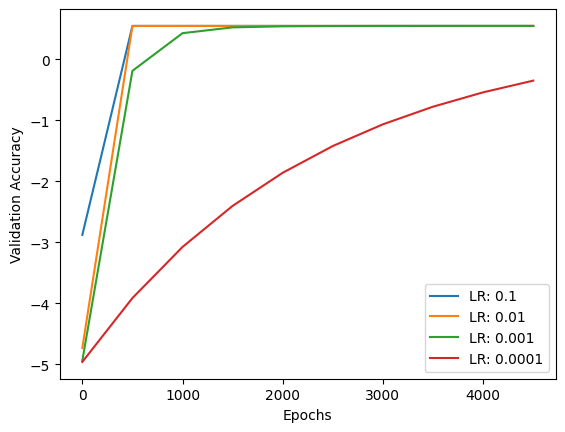

Best model learned with learning rate: 0.1
Best validation accuracy: 0.5464062355495862


In [8]:
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = 0

    def fit(self, X, y, epochs=5000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        losses = []
        val_accuracies = []

        for epoch in range(epochs):
            # Linear prediction
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute the loss (Mean Squared Error)
            loss = (1/n_samples) * np.sum((y_pred - y) ** 2)
            losses.append(loss)

            # Compute the gradients
            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Every 500 epochs, check validation accuracy
            if epoch % 500 == 0:
                val_pred = np.dot(X_val, self.weights) + self.bias
                val_accuracy = 1 - (np.sum((val_pred - y_val) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))
                val_accuracies.append(val_accuracy)
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")

        return losses, val_accuracies

# Train the model for different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_accuracy = -np.inf

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = LinearRegression(learning_rate=lr)
    losses, val_accuracies = model.fit(X_train, y_train, epochs=5000)

    # Track the best model based on validation accuracy
    if max(val_accuracies) > best_val_accuracy:
        best_val_accuracy = max(val_accuracies)
        best_model = model

    # Plotting loss and validation accuracy for each learning rate
    plt.plot(range(0, 5000, 500), val_accuracies, label=f"LR: {lr}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Report best model parameters
print(f"Best model learned with learning rate: {best_model.learning_rate}")
print(f"Best validation accuracy: {best_val_accuracy}")

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("https://github.com/HamedTabkhi/Intro-to-ML/raw/main/Dataset/Housing.csv")

# List of features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Separate features and target
X = df[numerical_features + categorical_features]
y = df['price']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training and validation data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

Training with learning rate: 0.1
Epoch 0: Loss = 25234792406487.6172, Validation Accuracy = 0.4627
Epoch 500: Loss = 3188.5760, Validation Accuracy = 1.0000
Epoch 1000: Loss = 0.0005, Validation Accuracy = 1.0000
Epoch 1500: Loss = 0.0000, Validation Accuracy = 1.0000
Epoch 2000: Loss = 0.0000, Validation Accuracy = 1.0000
Epoch 2500: Loss = 0.0000, Validation Accuracy = 1.0000
Epoch 3000: Loss = 0.0000, Validation Accuracy = 1.0000
Epoch 3500: Loss = 0.0000, Validation Accuracy = 1.0000
Epoch 4000: Loss = 0.0000, Validation Accuracy = 1.0000
Epoch 4500: Loss = 0.0000, Validation Accuracy = 1.0000
Training with learning rate: 0.01
Epoch 0: Loss = 25234792406487.6172, Validation Accuracy = -3.9182
Epoch 500: Loss = 11761421901.6896, Validation Accuracy = 0.9977
Epoch 1000: Loss = 1101797357.3496, Validation Accuracy = 0.9999
Epoch 1500: Loss = 202591969.0380, Validation Accuracy = 1.0000
Epoch 2000: Loss = 41859678.2919, Validation Accuracy = 1.0000
Epoch 2500: Loss = 8766628.9565, Vali

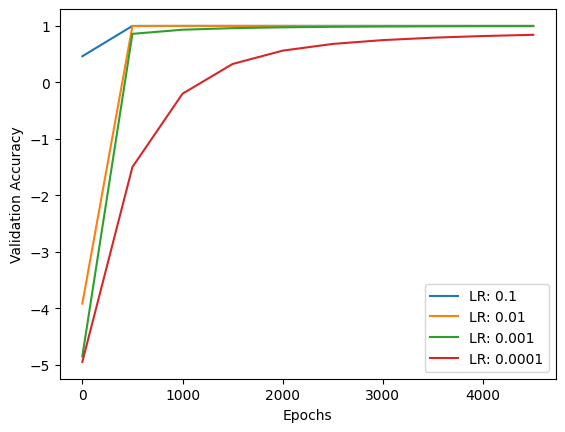

Best model learned with learning rate: 0.1
Best validation accuracy: 1.0


In [13]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = 0

    def fit(self, X, y, epochs=5000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        losses = []
        val_accuracies = []

        for epoch in range(epochs):
            # Linear prediction
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute the loss (Mean Squared Error)
            loss = (1/n_samples) * np.sum((y_pred - y) ** 2)
            losses.append(loss)

            # Compute the gradients
            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Every 500 epochs, check validation accuracy
            if epoch % 500 == 0:
                val_pred = np.dot(X_val, self.weights) + self.bias
                val_accuracy = 1 - (np.sum((val_pred - y_val) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2))
                val_accuracies.append(val_accuracy)
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")

        return losses, val_accuracies

# Train the model for different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_model = None
best_val_accuracy = -np.inf

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = LinearRegression(learning_rate=lr)
    losses, val_accuracies = model.fit(X_train, y_train, epochs=5000)

    # Track the best model based on validation accuracy
    if max(val_accuracies) > best_val_accuracy:
        best_val_accuracy = max(val_accuracies)
        best_model = model

    # Plotting loss and validation accuracy for each learning rate
    plt.plot(range(0, 5000, 500), val_accuracies, label=f"LR: {lr}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# Report best model parameters
print(f"Best model learned with learning rate: {best_model.learning_rate}")
print(f"Best validation accuracy: {best_val_accuracy}")